In [137]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [138]:
def get_exp_coeff(time,series):
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    time=range(len(time))
    
    y_log=np.log(series)
    lr.fit(np.array(time).reshape(-1,1),y_log)
    
    return lr.coef_

In [139]:
df2017=pd.read_csv('data/safest_banks50_2017.csv',index_col=0)
df2018=pd.read_csv('data/safest_banks50_2018.csv',index_col=0)
df2019=pd.read_csv('data/safest_banks50_2019.csv',index_col=0)
df2020=pd.read_csv('data/safest_banks50_2020.csv',index_col=0)
df2021=pd.read_csv('data/safest_banks50_2021.csv',index_col=0)
df2017.head()

,Group Name,Country,Statement,Assets(mn)
Rank,,,,
1,KfW,Germany,30,534429
2,Zürcher Kantonalbank,Switzerland,30,155222
3,Landwirtschaftliche Rentenbank,Germany,30,100185
4,L-Bank,Germany,30,79010
5,Bank Nederlandse Gemeenten,Netherlands,29,162327


In [140]:
df2020.head()

,Group Name,Country,Score,Assets(mn)
1,KfW,Germany,30.0,NaN
2,Zuercher Kantonalbank,Switzerland,30.0,NaN
3,BNG Bank,Netherlands,30.0,NaN
4,Landwirtschaftliche Rentenbank,Germany,30.0,NaN
5,Nederlandse Waterschapsbank,Netherlands,29.0,NaN


In [141]:
df2017.info(),df2018.info(),df2019.info(),df2020.info(),df2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Group Name  50 non-null     object
 1   Country     50 non-null     object
 2   Statement   50 non-null     int64 
 3   Assets(mn)  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Group Name  50 non-null     object
 1   Country     50 non-null     object
 2   Score       50 non-null     int64 
 3   Assets(mn)  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Group Name  50 non-null     o

(None, None, None, None, None)

In [142]:
tmpdf=pd.concat([df2017,df2018,df2019,df2020,df2021])

ranking_counts=pd.DataFrame(tmpdf['Country'].value_counts())

In [143]:
ranking_counts

,Country
Germany,36
Canada,31
United States,23
Australia,20
France,19
Sweden,19
Switzerland,18
Singapore,15
South Korea,15
Netherlands,14


In [144]:
ranking_counts.drop('Liechtenstein',axis=0,inplace=True)

In [145]:
## Germany EWG
## canada EWC
## US SPY
## australia EWA
## france EWQ
## sweden EWD
## swiss EWL
## singapore EWS
## korea EWY
## netherlands EWN
## norway ENOR
## finland EFNL
## uae UAE
## hong kong EWH
## china MCHI
## kuwait KWT

In [146]:
%pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [147]:
germany=pdr.DataReader('EWG',data_source='yahoo',start='2017',end='2022')
canada=pdr.DataReader('EWC',data_source='yahoo',start='2017',end='2022')
usa=pdr.DataReader('SPY',data_source='yahoo',start='2017',end='2022')
australia=pdr.DataReader('EWA',data_source='yahoo',start='2017',end='2022')
france=pdr.DataReader('EWQ',data_source='yahoo',start='2017',end='2022')
sweden=pdr.DataReader('EWD',data_source='yahoo',start='2017',end='2022')
swiss=pdr.DataReader('EWL',data_source='yahoo',start='2017',end='2022')
singapore=pdr.DataReader('EWS',data_source='yahoo',start='2017',end='2022')
korea=pdr.DataReader('EWY',data_source='yahoo',start='2017',end='2022')
netherlands=pdr.DataReader('EWN',data_source='yahoo',start='2017',end='2022')
norway=pdr.DataReader('ENOR',data_source='yahoo',start='2017',end='2022')
finland=pdr.DataReader('EFNL',data_source='yahoo',start='2017',end='2022')
uae=pdr.DataReader('UAE',data_source='yahoo',start='2017',end='2022')
hongkong=pdr.DataReader('EWH',data_source='yahoo',start='2017',end='2022')
china=pdr.DataReader('MCHI',data_source='yahoo',start='2017',end='2022')
taiwan=pdr.DataReader('EWT',data_source='yahoo',start='2017',end='2022')


In [148]:
range(len(k))

range(0, 1259)

In [149]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

y=germany['Adj Close']
y_log=np.log(y)

In [150]:
time=range(len(y_log))
lr.fit(np.array(time).reshape(-1,1),y_log)

LinearRegression()

<AxesSubplot:xlabel='Date'>

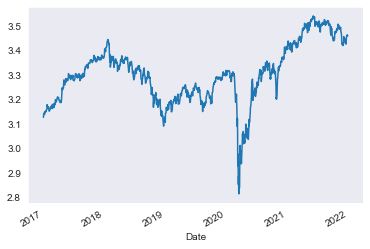

In [151]:
y_log.plot()

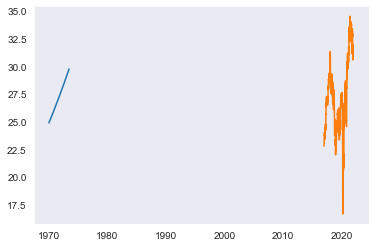

In [152]:
def expf(X):
    X=X.reshape(-1,1)
    return np.exp(lr.predict(X))

X=np.array(time)

r=expf(X)
s=pd.Series(r)
plt.plot(s)
plt.plot(y)

In [153]:
luxembourg=pd.read_csv('data/S&P_Luxembourg_2017.csv')

In [154]:
kuwait=pd.read_csv('data/S&P_Kuwait_2017.csv')

In [155]:
kuwait.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1445 non-null   object 
 1   Adj Close  1445 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.6+ KB


In [156]:
kuwait.dropna(inplace=True)

In [157]:
countries=[germany,canada,usa,australia,france,sweden,swiss,singapore,korea,netherlands,norway,finland,uae,hongkong,luxembourg,kuwait,china,taiwan]

In [158]:
luxembourg

,Date,Value
0,2017-01-02,63.36
1,2017-01-03,63.23
2,2017-01-04,63.58
3,2017-01-05,65.12
4,2017-01-06,64.53
...,...,...
1418,2022-06-09,56.79
1419,2022-06-10,54.27
1420,NaN,NaN
1421,NaN,NaN


In [159]:
luxembourg.isnull().sum()

Date     3
Value    3
dtype: int64

In [160]:
luxembourg['Date']=pd.to_datetime(luxembourg['Date'])
luxembourg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1420 non-null   datetime64[ns]
 1   Value   1420 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.4 KB


In [161]:
luxembourg.dropna(inplace=True)

In [162]:
luxembourg.head()

,Date,Value
0,2017-01-02,63.36
1,2017-01-03,63.23
2,2017-01-04,63.58
3,2017-01-05,65.12
4,2017-01-06,64.53


In [163]:
luxembourg['Date']=pd.to_datetime(luxembourg['Date'])

In [164]:
luxembourg=luxembourg[luxembourg['Date']<='2021-12-31']

In [165]:
luxembourg=luxembourg.set_index('Date')

In [166]:
luxembourg.rename(columns={'Value':'Adj Close'},inplace=True)

In [167]:
luxembourg.reset_index()

,Date,Adj Close
0,2017-01-02,63.36
1,2017-01-03,63.23
2,2017-01-04,63.58
3,2017-01-05,65.12
4,2017-01-06,64.53
...,...,...
1300,2021-12-27,68.33
1301,2021-12-28,68.43
1302,2021-12-29,69.20
1303,2021-12-30,68.36


In [168]:
for df in countries:
    df.reset_index(inplace=True)

In [170]:
luxembourg.reset_index(inplace=True)

In [176]:
luxembourg.columns

Index(['Date', 'Adj Close'], dtype='object')

In [177]:
kuwait.columns

Index(['index', 'Date', 'Adj Close'], dtype='object')

In [191]:
countries[14].rename(columns={'Value':'Adj Close'},inplace=True)

In [192]:
countries[14]

,index,Date,Adj Close
0,0,2017-01-02,63.36
1,1,2017-01-03,63.23
2,2,2017-01-04,63.58
3,3,2017-01-05,65.12
4,4,2017-01-06,64.53
...,...,...,...
1415,1415,2022-06-06,59.43
1416,1416,2022-06-07,59.82
1417,1417,2022-06-08,58.83
1418,1418,2022-06-09,56.79


In [193]:
score_list=[]

for df in countries:
    print(df.head())
    score_list.append(float(get_exp_coeff(df['Date'],df['Adj Close'])))

        Date       High        Low       Open      Close     Volume  Adj Close
0 2017-01-03  26.549999  26.410000  26.490000  26.500000  2838700.0  22.801811
1 2017-01-04  26.680000  26.510000  26.510000  26.660000  2657900.0  22.939484
2 2017-01-05  27.010000  26.790001  26.790001  26.950001  4653300.0  23.189013
3 2017-01-06  26.930000  26.809999  26.809999  26.860001  1278300.0  23.111572
4 2017-01-09  26.879999  26.700001  26.709999  26.830000  1195500.0  23.085760
        Date       High        Low       Open      Close     Volume  Adj Close
0 2017-01-03  26.430000  26.180000  26.180000  26.299999  3723400.0  23.416159
1 2017-01-04  26.790001  26.530001  26.559999  26.740000  1763200.0  23.807915
2 2017-01-05  27.090000  26.790001  26.840000  26.940001  3203300.0  23.985983
3 2017-01-06  27.010000  26.809999  27.000000  26.889999   868700.0  23.941469
4 2017-01-09  26.820000  26.610001  26.820000  26.700001   911300.0  23.772303
        Date        High         Low        Open    

In [194]:
score_list

[0.00014205799395738887,
 0.0002961121990402554,
 0.0005783065333757803,
 0.00023984983793638425,
 0.0002687813307043882,
 0.0004047556804180764,
 0.00043418010140940653,
 3.7060074028491556e-05,
 0.00023669659184268892,
 0.0005215128544386768,
 0.00014937284176239407,
 0.00031921827814809035,
 -0.00010518824563186361,
 0.0001521091552969908,
 -0.00018108591224404202,
 0.00039493311131043985,
 0.0003196918541177501,
 0.000617998560351402]

In [195]:
ranking_counts=ranking_counts.rename(columns={'Country':'counts'})
ranking_counts=ranking_counts.rename_axis('Country').reset_index()
ranking_counts

,Country,counts
0,Germany,36
1,Canada,31
2,United States,23
3,Australia,20
4,France,19
5,Sweden,19
6,Switzerland,18
7,Singapore,15
8,South Korea,15
9,Netherlands,14


In [196]:
bank_safety=pd.concat([ranking_counts,pd.Series(score_list,name='Score')],axis=1)
bank_safety

,Country,counts,Score
0,Germany,36,0.000142
1,Canada,31,0.000296
2,United States,23,0.000578
3,Australia,20,0.000240
4,France,19,0.000269
5,Sweden,19,0.000405
6,Switzerland,18,0.000434
7,Singapore,15,0.000037
8,South Korea,15,0.000237
9,Netherlands,14,0.000522


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-0.0005, 0.001)

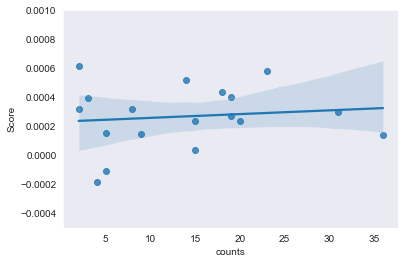

In [210]:
sns.regplot(bank_safety['counts'],bank_safety['Score'])
plt.ylim([-.0005,.001])

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'log scaled X')

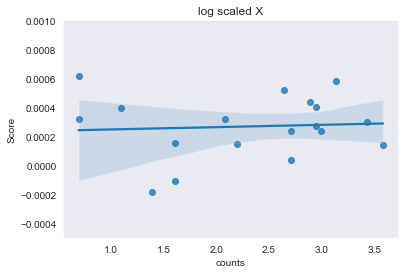

In [211]:
sns.regplot(np.log(bank_safety['counts']),bank_safety['Score'])
plt.ylim([-.0005,.001])
plt.title("log scaled X")

In [206]:
less_outliers_df=bank_safety[:-3]
less_outliers_df

,Country,counts,Score
0,Germany,36,0.000142
1,Canada,31,0.000296
2,United States,23,0.000578
3,Australia,20,0.000240
4,France,19,0.000269
5,Sweden,19,0.000405
6,Switzerland,18,0.000434
7,Singapore,15,0.000037
8,South Korea,15,0.000237
9,Netherlands,14,0.000522


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'less outliers')

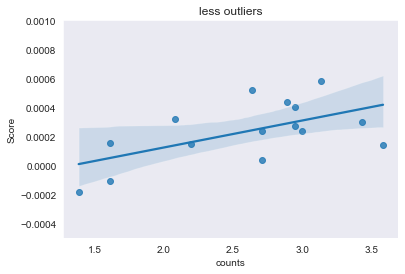

In [212]:
sns.regplot(np.log(less_outliers_df['counts']),less_outliers_df['Score'])
plt.ylim([-.0005,.001])
plt.title("less outliers")

In [ ]:
# without outliers

In [ ]:
bank_safety.to_csv('bank_safety.csv')